In [2]:
import pandas as pd
import numpy as np


df = pd.read_csv('/content/amazon.csv')

In [3]:
print(df.columns.tolist())


['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


In [4]:
df['discounted_price'] = df['discounted_price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

df['actual_price'] = df['actual_price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace(r'[^0-9.-]', '', regex=True)
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['rating_count'] = df['rating_count'].astype(str).str.replace(r'[^0-9]', '', regex=True)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


In [ ]:
import numpy as np

num_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

z_scores = np.abs((df[num_cols] - df[num_cols].mean()) / df[num_cols].std())
df_clean = df[(z_scores <= 3).all(axis=1)]
print("Original shape:", df.shape)
print("After removing outliers:", df_clean.shape)

Original shape: (1465, 16)
After removing outliers: (1369, 16)


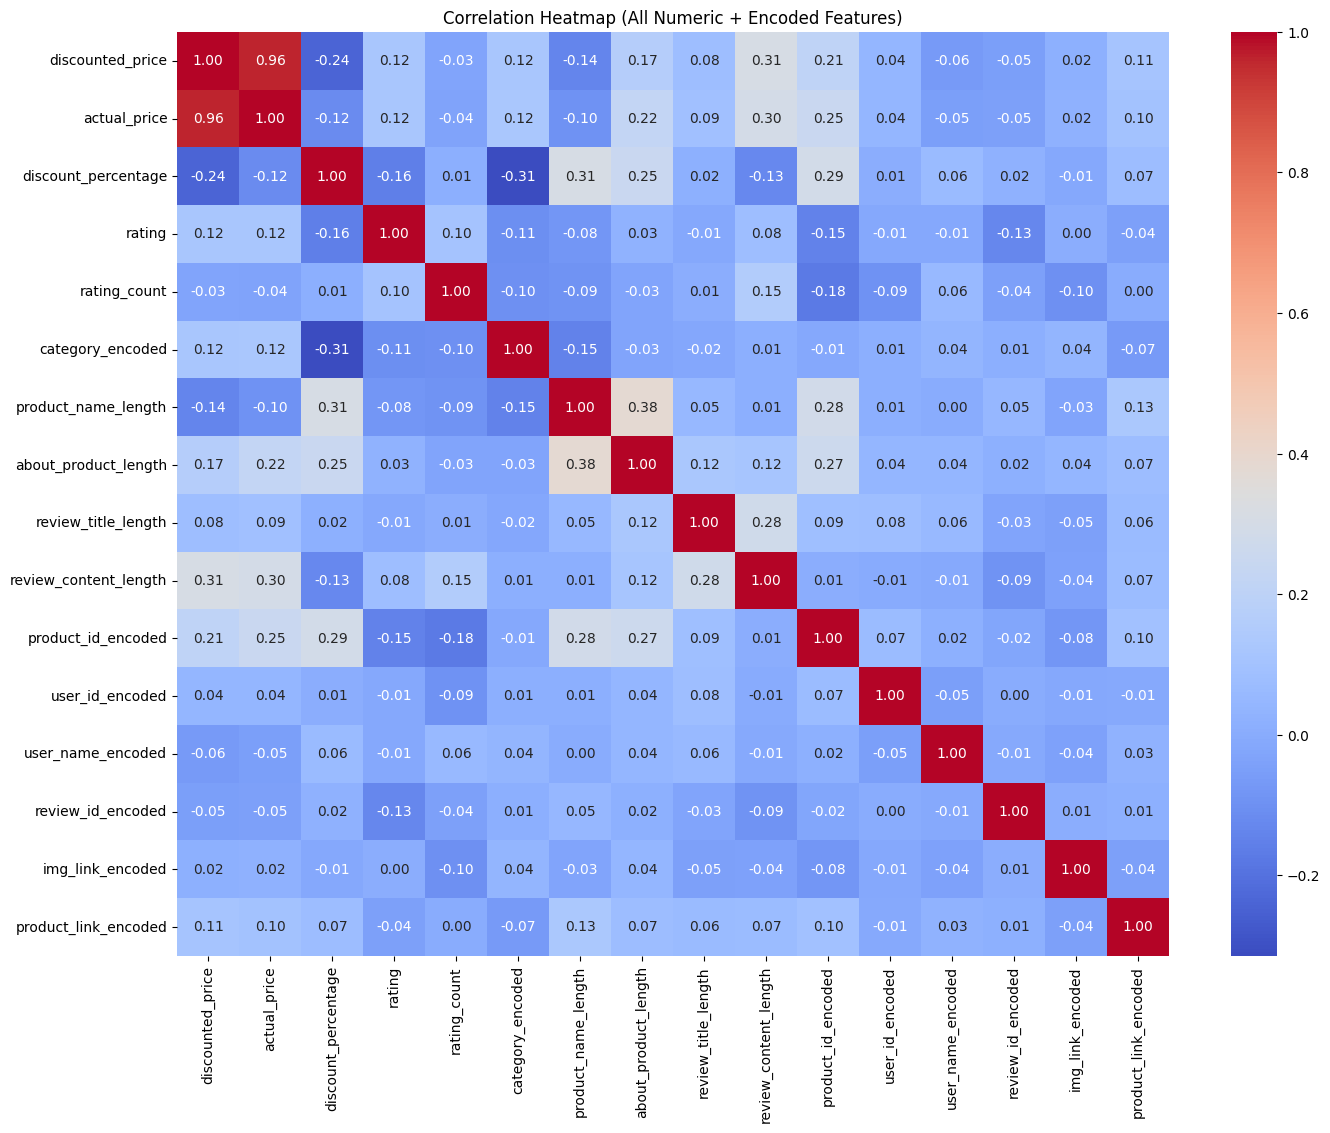

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_enc = LabelEncoder()


import numpy as np

# Convert numeric-like columns safely
df_encoded['discounted_price'] = df_encoded['discounted_price'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
df_encoded['actual_price'] = df_encoded['actual_price'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
df_encoded['discount_percentage'] = df_encoded['discount_percentage'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
df_encoded['rating'] = df_encoded['rating'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)
df_encoded['rating_count'] = df_encoded['rating_count'].astype(str).str.replace(r'[^0-9]', '', regex=True).replace('', np.nan).astype(float)


# 2. Encode categorical column
df_encoded['category_encoded'] = label_enc.fit_transform(df_encoded['category'].astype(str))

# 3. Encode text columns (length)
text_cols = ['product_name', 'about_product', 'review_title', 'review_content']
for col in text_cols:
    df_encoded[col + '_length'] = df_encoded[col].astype(str).apply(len)

# 4. Encode IDs and links
id_cols = ['product_id', 'user_id', 'user_name', 'review_id', 'img_link', 'product_link']
for col in id_cols:
    df_encoded[col + '_encoded'] = label_enc.fit_transform(df_encoded[col].astype(str))

# 5. Select all numeric + encoded columns
num_cols = df_encoded.select_dtypes(include=['number'])

# 6. Correlation heatmap
plt.figure(figsize=(16,12))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap (All Numeric + Encoded Features)")
plt.show()



In [5]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,1
rating_count,2
about_product,0
user_id,0


In [6]:
df = df.dropna()


In [7]:
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Length: 1462, dtype: bool


In [8]:
df = df.drop_duplicates()


In [9]:
cols_to_drop = ['review_id', 'review_title', 'review_content', 'img_link', 'product_link']
df = df.drop(columns=cols_to_drop, errors='ignore')

In [10]:
df.shape


(1462, 11)

In [11]:
import numpy as np

num_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

z_scores = np.abs((df[num_cols] - df[num_cols].mean()) / df[num_cols].std())

df_clean = df[(z_scores <= 3).all(axis=1)]

print("Original shape:", df.shape)
print("After removing outliers:", df_clean.shape)


Original shape: (1462, 11)
After removing outliers: (1369, 11)


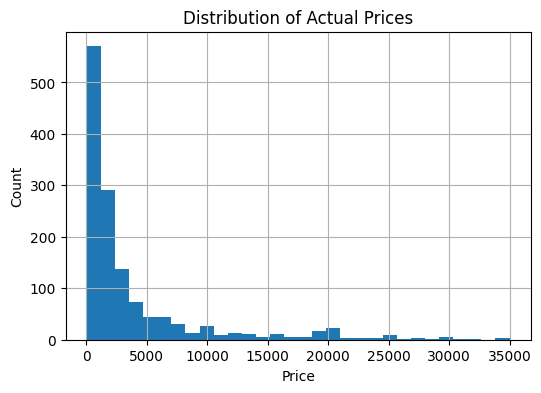

In [15]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df_clean['actual_price'].hist(bins=30)
plt.title("Distribution of Actual Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()




In [17]:
df_clean.loc[:, 'sub_category'] = df_clean['category'].str.split('|').str[1]


In [18]:
print(df_clean.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'sub_category'],
      dtype='object')>


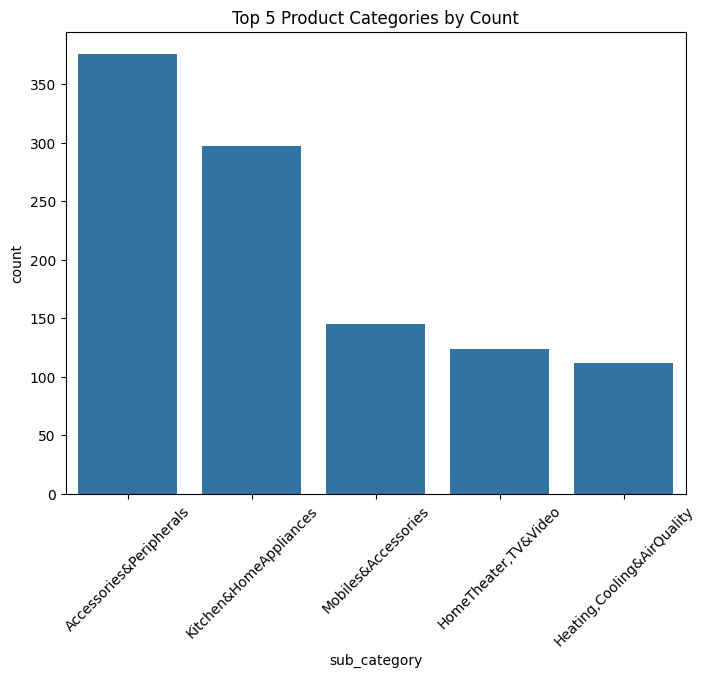

In [21]:
import seaborn as sns

plt.figure(figsize=(8,6))
top5_categories = df_clean['sub_category'].value_counts().head(5).index

sns.countplot(x='sub_category', data=df_clean[df_clean['sub_category'].isin(top5_categories)],
              order=top5_categories)

plt.xticks(rotation=45)
plt.title("Top 5 Product Categories by Count")
plt.show()



/tmp/ipython-input-3586686861.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="sub_category", data=avg_rating, palette="viridis")


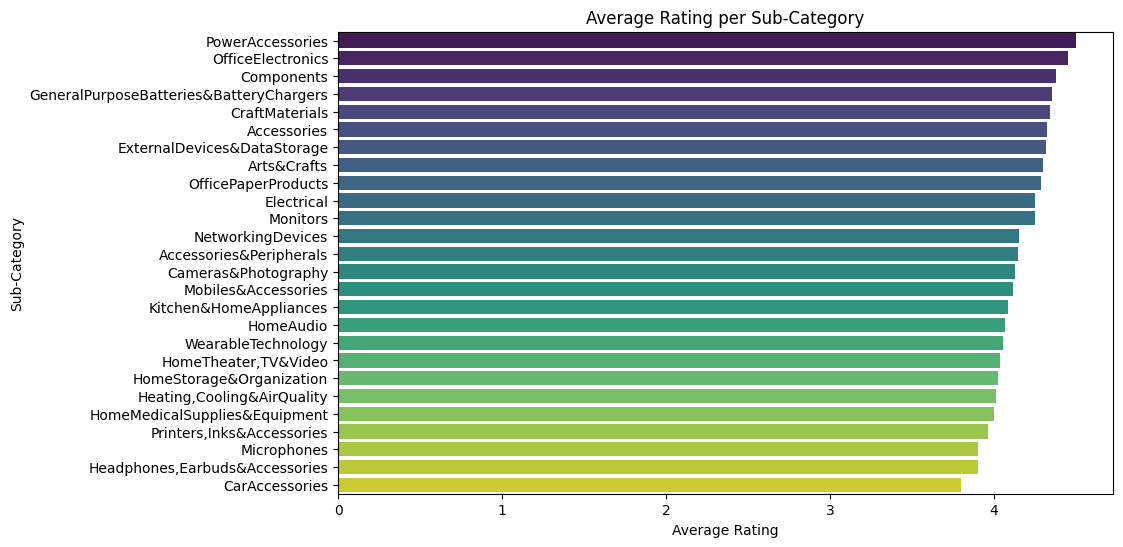

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average rating per sub-category
avg_rating = df_clean.groupby("sub_category")["rating"].mean().reset_index()

# Sort for better visualization
avg_rating = avg_rating.sort_values("rating", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="rating", y="sub_category", data=avg_rating, palette="viridis")
plt.title("Average Rating per Sub-Category")
plt.xlabel("Average Rating")
plt.ylabel("Sub-Category")
plt.show()


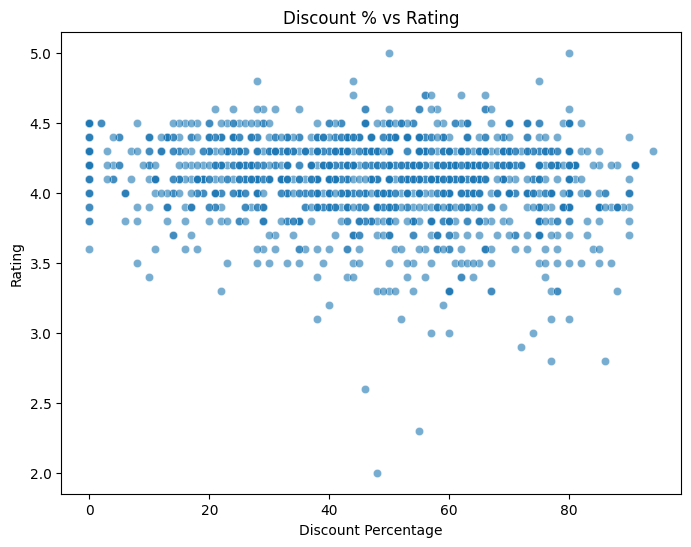

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x="discount_percentage", y="rating", data=df, alpha=0.6)
plt.title("Discount % vs Rating")
plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
plt.show()


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# --------------------
# Feature Engineering
# --------------------
df_clean = df_clean.copy()
df_clean['price_ratio'] = df_clean['discounted_price'] / df_clean['actual_price']
df_clean['expected_discount'] = df_clean['actual_price'] * (df_clean['discount_percentage'] / 100)

# --------------------
# Common Preprocessor
# --------------------
num_features = ['actual_price', 'discount_percentage', 'price_ratio', 'expected_discount']
cat_features = ['category']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# --------------------
# 1. Predict Rating
# --------------------
X1 = df_clean[num_features + cat_features]
y1 = df_clean['rating']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

print("------ Predicting Rating ------")
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X1_train, y1_train)
    y1_pred = pipe.predict(X1_test)
    print(f"{name}: MSE={mean_squared_error(y1_test, y1_pred):.4f}, R2={r2_score(y1_test, y1_pred):.4f}")


------ Predicting Rating ------
Linear Regression: MSE=0.0469, R2=0.2829
Ridge Regression: MSE=0.0434, R2=0.3359
Lasso Regression: MSE=0.0634, R2=0.0296
Decision Tree: MSE=0.0847, R2=-0.2956
Random Forest: MSE=0.0447, R2=0.3167


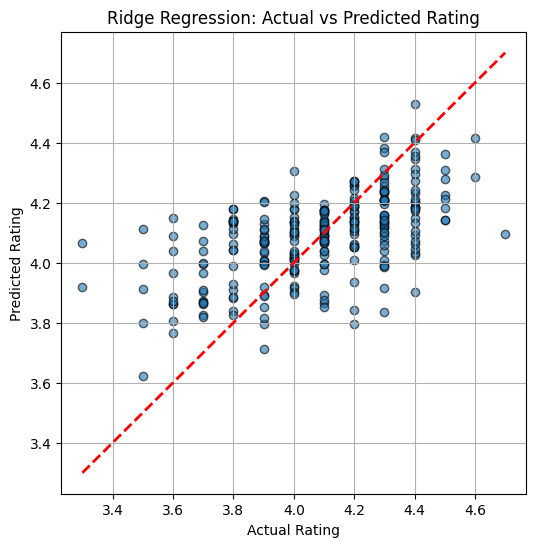

In [32]:
# ------------------------------
# Visualize Ridge Regression
# ------------------------------
best_model = Ridge(alpha=1.0)
pipe_ridge = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
pipe_ridge.fit(X1_train, y1_train)

y1_pred_ridge = pipe_ridge.predict(X1_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y1_test, y1_pred_ridge, alpha=0.6, edgecolor='k')
plt.plot([y1_test.min(), y1_test.max()],
         [y1_test.min(), y1_test.max()],
         'r--', lw=2)  # diagonal line

plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Ridge Regression: Actual vs Predicted Rating")
plt.grid(True)
plt.show()


In [33]:
X2 = df_clean[num_features + cat_features]
y2 = df_clean['discounted_price']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

print("\n------ Predicting Discounted Price ------")
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X2_train, y2_train)
    y2_pred = pipe.predict(X2_test)
    print(f"{name}: MSE={mean_squared_error(y2_test, y2_pred):.2f}, R2={r2_score(y2_test, y2_pred):.4f}")


------ Predicting Discounted Price ------
Linear Regression: MSE=266.27, R2=1.0000
Ridge Regression: MSE=1545.66, R2=0.9999
Lasso Regression: MSE=394.41, R2=1.0000
Decision Tree: MSE=230384.66, R2=0.9841
Random Forest: MSE=52809.19, R2=0.9963


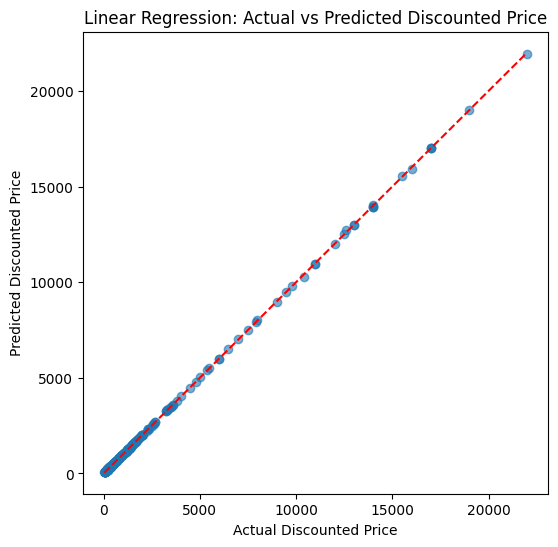

In [34]:
import matplotlib.pyplot as plt

# Fit best model (Linear Regression) again
best_model = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])
best_model.fit(X2_train, y2_train)
y2_pred_lr = best_model.predict(X2_test)

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y2_test, y2_pred_lr, alpha=0.6)
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], 'r--')  # perfect line
plt.xlabel("Actual Discounted Price")
plt.ylabel("Predicted Discounted Price")
plt.title("Linear Regression: Actual vs Predicted Discounted Price")
plt.show()
